ボストン郊外地域の項目と住宅価値のデータを読み込みます。

In [0]:
import pandas as pd # ファイルを読み込むためのライブラリ
house = pd.read_csv("https://raw.githubusercontent.com/david3080/ColabNotebooks/master/boston/BostonHousing.csv")
house

読み込んだデータから部屋数と低所得者率、住宅価値を抜き出して、それらの関係を３次元グラフにプロットします。

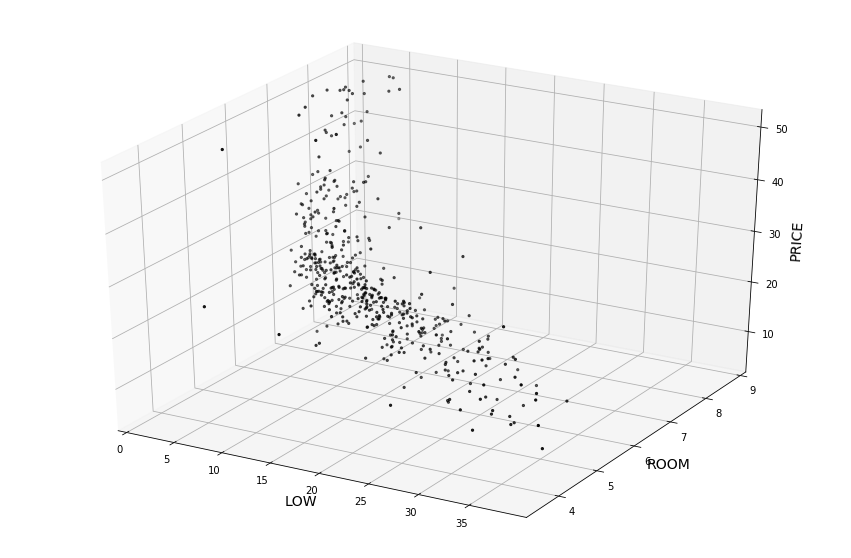

In [8]:
import numpy as np # 数値計算用のライブラリをnpとして読み込む
import matplotlib.pyplot as plt # グラブ描画用のライブラリをpltとして読み込む
from mpl_toolkits.mplot3d import Axes3D # 3Dグラフ描画用のおまじない

fig = plt.figure(figsize=(15, 10)) #　figsizeでグラフの大きさを変えます

ax = fig.add_subplot(111, projection = '3d') # 3D散布図を定義
ax.set_xlabel('LOW', fontsize=14)
ax.set_ylabel('ROOM', fontsize=14)
ax.set_zlabel('PRICE', fontsize=14)

# 散布図
low = house['低所得者率'].values
room = house['部屋数'].values
price = house['住宅価値'].values
ax.scatter(low, room, price, s=5, c='black') # 散布図の点データを設定

fig.show()

1行目の全要素が"1.0"で、2行目の要素が部屋数、3行目の要素が低所得率からなる3行506列の行列を作成します。

In [13]:
import numpy as np

# 部屋数を表す一次元配列(room.values)に0列目を追加して、0列目（axis=1）に1.0をセットします
x1 = np.insert(room[:,np.newaxis], 0, 1.0, axis=1)
x2 = np.vstack((x1.T,low)).T
print(x2)

# 行列数を表示します
print(x2.shape)

# 行数をカウントします
M = x2.shape[0]
print(M)

[[1.    6.575 4.98 ]
 [1.    6.421 9.14 ]
 [1.    7.185 4.03 ]
 ...
 [1.    6.976 5.64 ]
 [1.    6.794 6.48 ]
 [1.    6.03  7.88 ]]
(506, 3)
506


In [6]:
M = x2.shape[0] # 学習用のサンプルデータ数
alpha = 0.001 # 学習率(0.01だと損失数が発散する)
w = np.ones(3) # wの初期値。[1,1,1]のベクトル
history = np.zeros((0,2)) # 損失数の記録用

for k in range(100001):
    yp = x2 @ w # 学習データとwの内積をとって予測値を求める
    yd = yp - price # 予測値と結果の差分
    w = w - alpha * (x2.T @ yd)/M
    if ( k % 5000 == 0):
        loss = np.mean(yd ** 2) / 2 # 損失数
        history = np.vstack((history, np.array([k, loss]))) # 繰り返し数(k)と損失数(loss)の配列を追加
        print( "繰り返し数 = %d  損失数 = %f" % (k, loss))
        
print(w)

繰り返し数 = 0  損失数 = 112.063982
繰り返し数 = 5000  損失数 = 15.279365
繰り返し数 = 10000  損失数 = 15.278037
繰り返し数 = 15000  損失数 = 15.276785
繰り返し数 = 20000  損失数 = 15.275606
繰り返し数 = 25000  損失数 = 15.274494
繰り返し数 = 30000  損失数 = 15.273445
繰り返し数 = 35000  損失数 = 15.272457
繰り返し数 = 40000  損失数 = 15.271526
繰り返し数 = 45000  損失数 = 15.270648
繰り返し数 = 50000  損失数 = 15.269821
繰り返し数 = 55000  損失数 = 15.269041
繰り返し数 = 60000  損失数 = 15.268306
繰り返し数 = 65000  損失数 = 15.267613
繰り返し数 = 70000  損失数 = 15.266959
繰り返し数 = 75000  損失数 = 15.266344
繰り返し数 = 80000  損失数 = 15.265763
繰り返し数 = 85000  損失数 = 15.265216
繰り返し数 = 90000  損失数 = 15.264701
繰り返し数 = 95000  損失数 = 15.264215
繰り返し数 = 100000  損失数 = 15.263757
[ 0.22178481  4.87612541 -0.65788832]


グラフ表示します。

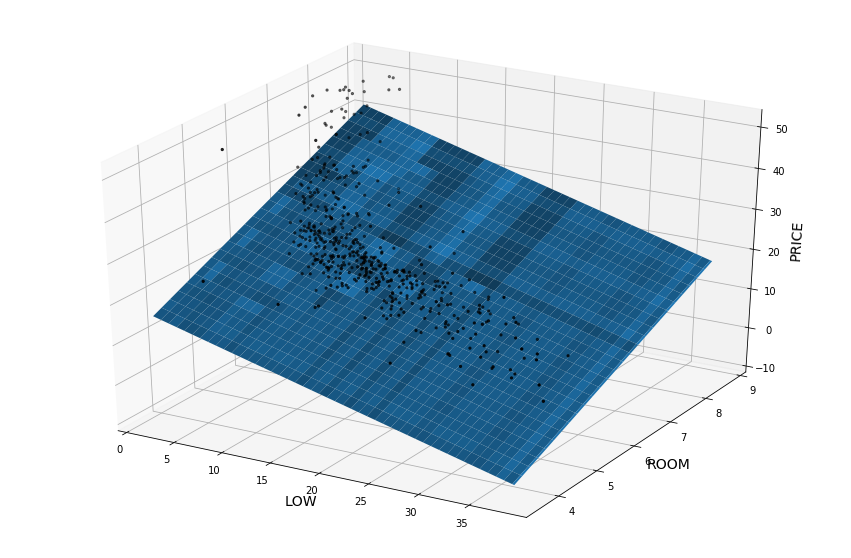

In [7]:
fig = plt.figure(figsize=(15, 10)) #　figsizeでグラフの大きさを変えます

ax = fig.add_subplot(111, projection = '3d') # 3D散布図を定義
ax.set_xlabel('LOW', fontsize=14)
ax.set_ylabel('ROOM', fontsize=14)
ax.set_zlabel('PRICE', fontsize=14)

# 散布図
low = house['低所得者率'].values
room = house['部屋数'].values
price = house['住宅価値'].values
ax.scatter(low,room,price, s=5, c='black') # 散布図の点データを設定

# 平面図
X, Y = np.meshgrid(np.arange(low.min(), low.max(), 0.1),np.arange(room.min(), room.max(),0.1))
Z = w[0] + w[1]*Y + w[2]*X
ax.plot_surface(X, Y, Z)

fig.show()

学習曲線をグラフ表示します

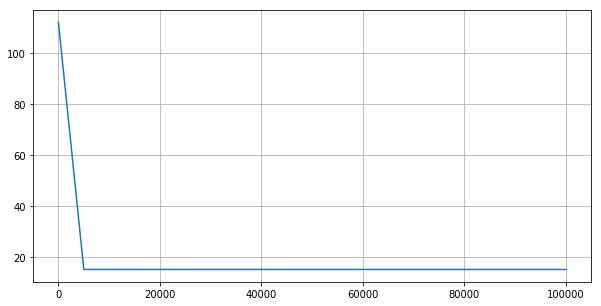

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.show()